# Example Usage

Here is a demonstartion of the potential usage of ```cbm_runner```.


## Imports

Firstly, we start of by importing the relevant classes. 


In [1]:
from goblin_cbm_runner.default_runner.runner import Runner
import pandas as pd
import matplotlib.pyplot as plt
import os


import warnings

# Filter out the RuntimeWarning related to unsupported linux distribution
warnings.filterwarnings("ignore", message="untested linux distribution:", category=RuntimeWarning)


The ```Runner``` class is basically used to set to run the scenarios based on the configuration files for the CBM CFS3.



## The Runner

In the first example below, we will set the path to the configurations and data, define the base and target year. Finally, we will create a directory for our outputs

In [6]:
# path to data
path = "../tests/data/runner_input/"

# afforestation data for each scenario
afforest_data = pd.read_csv(
    os.path.join(path, "cbm_afforestation.csv"), index_col=0
)

# basic configuration file
config = os.path.join(path, "cbm_factory.yaml")

# scenario_data
sc_data = pd.read_csv(os.path.join(path, "scenario_dataframe.csv"))

# calibration and end point
calibration_year = 2020


#Make directory to store exported file

os.mkdir("jupyter_example")

data_path = "./jupyter_example/"


## Data Inputs Example
Here we can see what our data inputs look like. 

In [7]:
# Scenario afforestation areas 
print(afforest_data)

    scenario species yield_class     total_area
0         -1   Sitka     YC17_20       0.000000
1         -1   Sitka     YC20_24       0.000000
2         -1   Sitka     YC24_30       0.000000
3         -1     SGB         YC6       0.000000
4         -1     SGB         YC6       0.000000
5         -1     SGB         YC6       0.000000
6          0   Sitka     YC24_30  417595.058325
7          0     SGB         YC6  715935.503074
8          0   Sitka     YC20_24  208791.204651
9          0     SGB         YC6  357956.908635
10         0   Sitka     YC17_20       0.000000
11         0     SGB         YC6       0.000000
12         1   Sitka     YC24_30  418877.449812
13         1     SGB         YC6  718134.067390
14         1   Sitka     YC20_24  508198.559238
15         1     SGB         YC6  871268.430782
16         1   Sitka     YC17_20    5823.216747
17         1     SGB         YC6    9983.469700


In [8]:
# Configuration file
with open(config, 'r') as file:
    config_contents = file.read()

print(config_contents) 

Classifiers:

  harvest:
    clearfell: 0.05
    thinning: 0.05

  age_classes:
    max_age: 100
    age_interval: 5

  species:
    - Sitka
    - SGB

  yield_class:
    Sitka:
      - YC13_16: 0.37
      - YC17_20: 0.26
      - YC20_24: 0.20
      - YC24_30: 0.17
    SGB:
      - YC10: 1



In [9]:
# Scenario data
print(sc_data)

    Unnamed: 0  Scenarios Cattle systems Manure management      Dairy pop  \
0            0          0          Dairy        tank solid       0.000000   
1            1          0          Dairy       tank liquid  172390.090632   
2            2          0           Beef        tank solid       0.000000   
3            3          0           Beef       tank liquid       0.000000   
4            4          0  Lowland sheep       tank liquid       0.000000   
5            5          0   Upland sheep       tank liquid       0.000000   
6            6          1          Dairy        tank solid       0.000000   
7            7          1          Dairy       tank liquid  172390.090632   
8            8          1           Beef        tank solid       0.000000   
9            9          1           Beef       tank liquid       0.000000   
10          10          1  Lowland sheep       tank liquid       0.000000   
11          11          1   Upland sheep       tank liquid       0.000000   

### Define classes and Run Scenarios

In [10]:
# instance of the Runner class
runner = Runner(config, calibration_year, afforest_data, sc_data)

In [11]:

# generation of aggregated results
runner.run_aggregate_scenarios().to_csv(os.path.join(data_path, "c_stock.csv"))

# generation of annual flux results
runner.run_flux_scenarios().to_csv(os.path.join(data_path, "c_flux.csv"))


In [12]:
#Lets try importing and displaying the information

stocks = pd.read_csv(os.path.join(data_path, "c_stock.csv"), index_col=0)

fluxes = pd.read_csv(os.path.join(data_path, "c_flux.csv"), index_col=0)

#We can always store these in memory without exporting to disk. 

In [13]:
stocks

,Year,AGB,BGB,Deadwood,Litter,Soil,Total Ecosystem,Scenario
0,2019,4.514063e+07,1.008655e+07,5.315835e+07,8.388287e+06,3.874221e+07,1.555160e+08,-1
1,2020,4.610093e+07,1.029068e+07,5.211839e+07,8.830165e+06,3.877506e+07,1.561152e+08,-1
2,2021,4.745335e+07,1.057998e+07,5.107502e+07,9.038926e+06,3.880305e+07,1.569503e+08,-1
3,2022,4.841501e+07,1.078096e+07,5.011462e+07,9.337436e+06,3.883307e+07,1.574811e+08,-1
4,2023,4.951853e+07,1.101266e+07,4.917845e+07,9.538436e+06,3.886076e+07,1.581088e+08,-1
...,...,...,...,...,...,...,...,...
91,2046,1.459660e+08,3.527904e+07,3.796185e+07,2.825003e+07,4.334884e+07,2.908057e+08,1
92,2047,1.546247e+08,3.723611e+07,3.804406e+07,2.963456e+07,4.370675e+07,3.032462e+08,1
93,2048,1.635621e+08,3.924021e+07,3.819754e+07,3.109648e+07,4.407945e+07,3.161758e+08,1
94,2049,1.722594e+08,4.118567e+07,3.846841e+07,3.272559e+07,4.446854e+07,3.291076e+08,1


In [14]:
fluxes

,Year,AGB,BGB,Deadwood,Litter,Soil,Total Ecosystem,Scenario
0,2020,9.587128e+05,2.043476e+05,-1.040299e+06,4.458754e+05,33049.974730,6.016866e+05,-1
1,2021,1.350651e+06,2.892071e+05,-1.039965e+06,2.098019e+05,28173.676362,8.378685e+05,-1
2,2022,9.518484e+05,1.992411e+05,-9.578365e+05,3.046261e+05,30219.430345,5.280986e+05,-1
3,2023,1.103163e+06,2.320931e+05,-9.367093e+05,2.014862e+05,27734.597669,6.277673e+05,-1
4,2024,1.026164e+06,2.137390e+05,-9.062663e+05,1.911245e+05,28610.325672,5.533716e+05,-1
...,...,...,...,...,...,...,...,...
88,2046,8.292969e+06,1.890187e+06,1.869218e+04,1.341082e+06,343976.729581,1.188691e+07,1
89,2047,8.661906e+06,1.957859e+06,7.975046e+04,1.383848e+06,357918.851730,1.244128e+07,1
90,2048,8.910767e+06,1.998299e+06,1.658827e+05,1.467204e+06,372833.721457,1.291499e+07,1
91,2049,8.663388e+06,1.938492e+06,2.822577e+05,1.636610e+06,389239.147685,1.290999e+07,1


# Plot Fluxes for Baseline

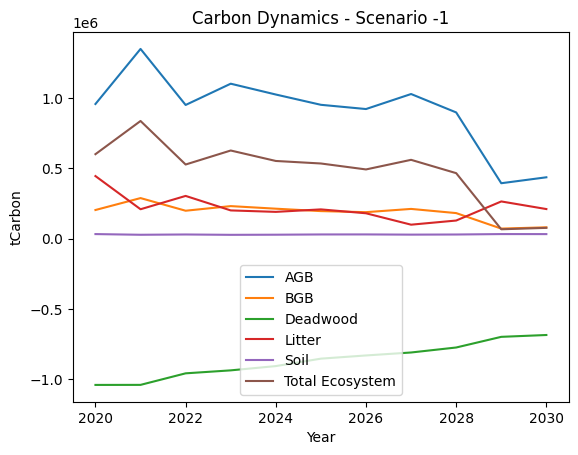

In [15]:
# 1. Limit Year Range
data_to_plot = fluxes[(fluxes['Year'] >= 2020) & (fluxes['Year'] <= 2030)] 

# 2. Select Scenario 
scenario_to_plot = -1
data_to_plot = data_to_plot[data_to_plot['Scenario'] == scenario_to_plot]

# 3. Plotting
plt.plot(data_to_plot['Year'], data_to_plot['AGB'], label='AGB')
plt.plot(data_to_plot['Year'], data_to_plot['BGB'], label='BGB')
plt.plot(data_to_plot['Year'], data_to_plot['Deadwood'], label='Deadwood')
plt.plot(data_to_plot['Year'], data_to_plot['Litter'], label='Litter')
plt.plot(data_to_plot['Year'], data_to_plot['Soil'], label='Soil')
plt.plot(data_to_plot['Year'], data_to_plot['Total Ecosystem'], label='Total Ecosystem')

# 4. Customization
plt.xlabel('Year')
plt.ylabel('tCarbon') 
plt.title(f'Carbon Dynamics - Scenario {scenario_to_plot}')
plt.legend()
plt.show()

In [16]:
# Remove Generated files 

for filename in os.listdir(data_path):
    file_path = os.path.join(data_path, filename)
    try:
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Deleted file: {file_path}")
    except Exception as e:
        print(f"Error deleting file: {file_path}. Reason: {e}")
        
#Remove direcotry 
os.rmdir(data_path)

Deleted file: ./jupyter_example/c_flux.csv
Deleted file: ./jupyter_example/c_stock.csv
